In [2]:
import pandas as pd

df = pd.read_csv("../processed/clean_dataset_numeric.csv")

df.head()

,OrderID,OrderDate,CustomerID,ProductID,Quantity,UnitPrice,Discount,TotalAmount,City,SellerID
0,ORD0075722,2022-12-22,CUST006588,P00003,4,298.45,0.05,1144.54,Columbus,SELL01349
1,ORD0080185,2023-05-12,CUST005827,P00032,2,154.48,0.00,341.31,Jacksonville,SELL00680
2,ORD0019865,2021-09-08,CUST019087,P00014,3,400.34,0.05,1243.58,Chicago,SELL00556
3,ORD0076700,2023-03-12,CUST000432,P00034,1,175.53,0.10,175.42,Houston,SELL00299
4,ORD0092992,2022-09-10,CUST011736,P00016,5,190.37,0.00,1077.22,Charlotte,SELL01625


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      10000 non-null  object 
 1   OrderDate    10000 non-null  object 
 2   CustomerID   10000 non-null  object 
 3   ProductID    10000 non-null  object 
 4   Quantity     10000 non-null  int64  
 5   UnitPrice    10000 non-null  float64
 6   Discount     10000 non-null  float64
 7   TotalAmount  10000 non-null  float64
 8   City         10000 non-null  object 
 9   SellerID     10000 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 781.4+ KB


In [4]:
df.isnull().sum()

OrderID        0
OrderDate      0
CustomerID     0
ProductID      0
Quantity       0
UnitPrice      0
Discount       0
TotalAmount    0
City           0
SellerID       0
dtype: int64

In [5]:
df["revenue"] = df["TotalAmount"] * df["Quantity"]

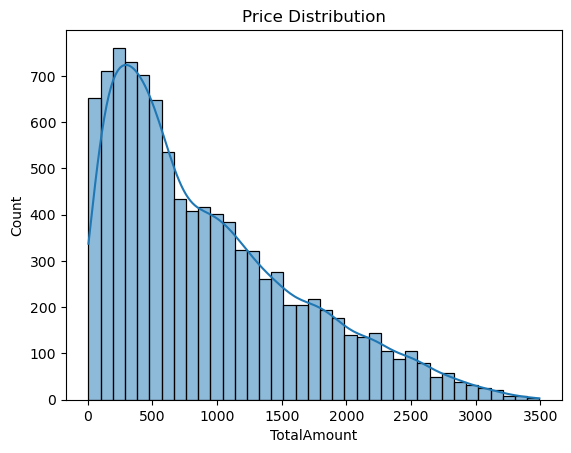

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["TotalAmount"], kde=True)
plt.title("Price Distribution") #showing affordability-focused pricing strategy.
plt.show()

In [7]:
product_sales = df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)

product_sales.plot(kind="bar", figsize=(10,5), title="Product-wise Sales Distribution")
plt.show()
#A small number of products contribute to most of the total sales, indicating high-performing items

KeyError: 'ProductName'

In [ ]:
product_sales = df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
#Kuch products high demand generate karte hain. In products par dynamic pricing ka zyada impact hoga.
plt.figure(figsize=(10,5))
product_sales.head(10).plot(kind="bar")
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Quantity Sold")
plt.show()

In [ ]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"])

daily_sales = df.groupby("OrderDate")["Quantity"].sum()

daily_sales.plot(figsize=(12,5), title="Sales Over Time")
plt.show()
#Demand shows peaks on certain days, indicating seasonal or event-driven demand.

In [ ]:
daily_revenue = df.groupby("OrderDate")["TotalAmount"].sum()

plt.figure(figsize=(12,5))
daily_revenue.plot()
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

#Revenue ka trend sales ke saath vary karta hai. Kuch days par kam sales hone ke baad bhi revenue zyada hai, jo high pricing ko indicate karta hai.
#Revenue fluctuates more than demand, showing price changes strongly impact revenue.

In [ ]:
#demand elasticity (core of dynamic pricing)
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x="UnitPrice", y="Quantity", data=df)
plt.title("Price vs Quantity Sold")
plt.xlabel("Price")
plt.ylabel("Quantity Sold")
plt.show()

#As price increases, quantity sold generally decreases, indicating price sensitivity for some products.

In [ ]:
#Products were segmented based on demand and price levels to apply different pricing strategies.
df["demand_category"] = pd.qcut(df["Quantity"], q=3, labels=["Low Demand", "Medium Demand", "High Demand"])
df["price_category"] = pd.qcut(df["UnitPrice"], q=3, labels=["Low Price", "Medium Price", "High Price"])

df[["ProductName", "demand_category", "price_category"]].head()

In [ ]:
zero_sales = df[df["Quantity"] == 0]

zero_sales.groupby("OrderDate")["Quantity"].count().plot(
    figsize=(12,5), 
    title="Zero Sales Occurrences Over Time (Stockout Proxy)"
)
plt.show()